In [386]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [387]:
data = pd.read_csv('Iris.csv')

In [388]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [389]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [390]:
data['Species'].value_counts()


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [391]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [392]:
data.drop('Id',inplace=True,axis=1)

# EDA

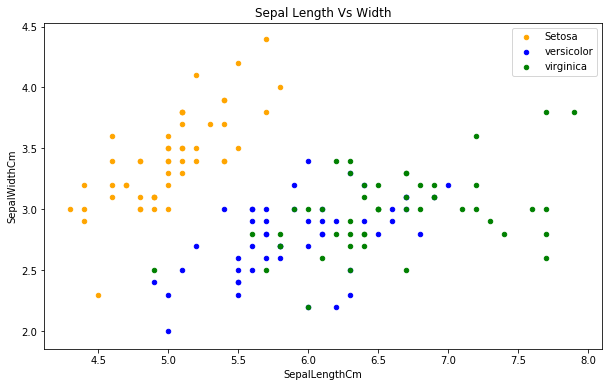

In [393]:
# relationship between Sepal length and Width
fig = data[data['Species'] == 'Iris-setosa'].plot(x='SepalLengthCm',y='SepalWidthCm',kind='scatter', 
                                                  color='orange',label='Setosa')

data[data['Species'] == 'Iris-versicolor'].plot(x='SepalLengthCm',y='SepalWidthCm',kind='scatter',
                                                color='blue',label='versicolor',ax=fig)

data[data['Species'] == 'Iris-virginica'].plot(x='SepalLengthCm',y='SepalWidthCm',kind='scatter',
                                               color='green',label='virginica',ax=fig)   
fig.set_title('Sepal Length Vs Width')
fig = plt.gcf()
fig.set_size_inches(10,6)

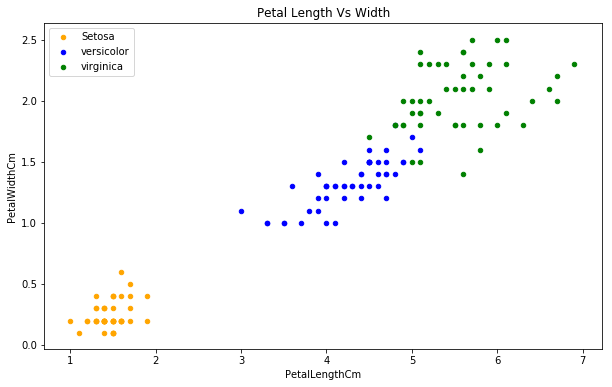

In [394]:
# relationship between Petal length and Width
fig = data[data['Species'] == 'Iris-setosa'].plot(x='PetalLengthCm',y='PetalWidthCm',kind='scatter', 
                                                  color='orange',label='Setosa')

data[data['Species'] == 'Iris-versicolor'].plot(x='PetalLengthCm',y='PetalWidthCm',kind='scatter',
                                                color='blue',label='versicolor',ax=fig)

data[data['Species'] == 'Iris-virginica'].plot(x='PetalLengthCm',y='PetalWidthCm',kind='scatter',
                                               color='green',label='virginica',ax=fig)   
fig.set_title('Petal Length Vs Width')
fig = plt.gcf()
fig.set_size_inches(10,6)

As we can see that the Petal Features are giving a better
cluster division compared to the Sepal features. 
This is an indication that the Petals can help in better and accurate 
Predictions over the Sepal. We will check that later.

In [395]:
# Distribution of Length and Width

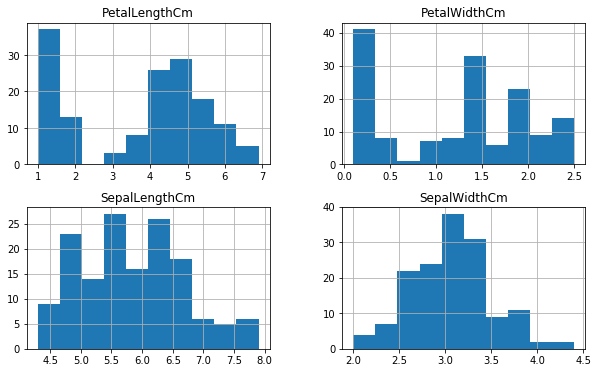

In [396]:
data.hist()
fig = plt.gcf()
fig.set_size_inches(10,6)

Now let us see how the length and width vary according to the species



plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot('Species','PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot('Species','PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot('Species','SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot('Species','SepalWidthCm',data=data)


The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

Modelling
Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model.
Classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

In [397]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split # Splitiing the data
from sklearn import metrics # for checking model accuracy

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

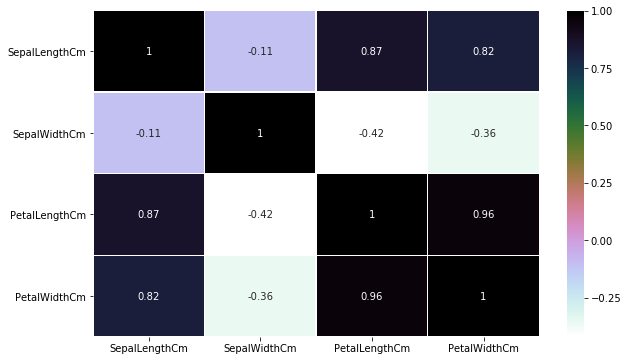

In [398]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r',linewidths=.5)
plt.yticks(rotation=0)

Observation--->

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Steps To Be followed When Applying an Algorithm
Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
Then pass the training dataset to the algorithm to train it. We use the .fit() method
Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
We then check the accuracy by passing the predicted outcome and the actual output to the model.


In [399]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species']);

In [400]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [401]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']].values
y = data['Species'].values

In [402]:
# Splitting The Data into Training And Testing Dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [403]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

print(logmodel.coef_)

[[ 0.35923106  1.3865937  -2.04950049 -0.95112933]
 [ 0.426059   -1.53494927  0.51781884 -1.24996899]
 [-1.47643111 -1.20613957  2.05434715  2.23826754]]


In [404]:
predictions = logmodel.predict(X_test)

# Evaluation

In [405]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      0.90      0.95        20
          2       0.86      1.00      0.92        12

avg / total       0.96      0.96      0.96        45

[[13  0  0]
 [ 0 18  2]
 [ 0  0 12]]


In [406]:
# Accuracy

logmodel.score(X = X_test,y = y_test)

0.9555555555555556

In [407]:
import statsmodels.formula.api as sm

In [408]:
model = sm.OLS(y_train,X_train)

In [409]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     943.7
Date:                Wed, 14 Feb 2018   Prob (F-statistic):           5.10e-79
Time:                        16:56:36   Log-Likelihood:                 13.619
No. Observations:                 105   AIC:                            -19.24
Df Residuals:                     101   BIC:                            -8.623
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0242      0.061     -0.395      0.6